In [0]:
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import scipy.io as sio
import os
import random

import torch
from fastai.data_block import DataBunch
from fastai.metrics import accuracy
from fastai.vision import Learner
from torch import nn
from torch.nn import CrossEntropyLoss
from torch.utils import data
from fastai.vision import *

from matplotlib.colors import is_color_like

In [8]:
from google.colab import drive
drive.mount('/content/drive')

path = Path('drive/My Drive/Colab Notebooks/Neuroscience/data/normal/11x12x12')

filenames = [file.name.split('_')[0] for file in os.scandir(path) if file.name.endswith('labels.npy')]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
array = np.load(path/f"{filenames[0]}.npy")

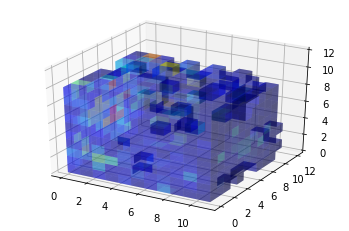

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
norm = colors.Normalize(array[0].min(), array[0].max())
facecolors = cm.jet(norm(array[0]))

#transparency
facecolors[:, :, :, -1] = 0.4

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(array[0], facecolors=facecolors)

# plt.show()
plt.savefig(path/"voxels.jpg", transparent=True)

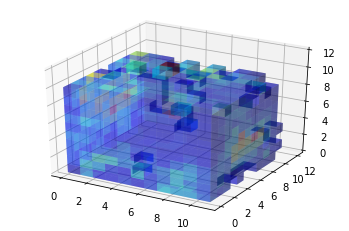

In [27]:
norm = colors.Normalize(array.sum(axis=0).min(), array.sum(axis=0).max())
facecolors = cm.jet(norm(array.sum(axis=0)))

#transparency
facecolors[:, :, :, -1] = 0.4

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(array.sum(axis=0), facecolors=facecolors)

# plt.show()
plt.savefig(path/"voxels_sum.jpg", transparent=True)

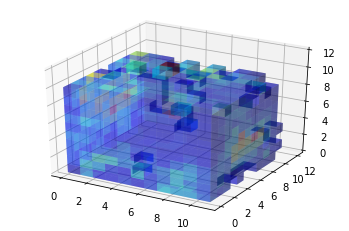

In [28]:
norm = colors.Normalize(array.mean(axis=0).min(), array.mean(axis=0).max())
facecolors = cm.jet(norm(array.mean(axis=0)))

#transparency
facecolors[:, :, :, -1] = 0.4

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(array.mean(axis=0), facecolors=facecolors)

# plt.show()
plt.savefig(path/"voxels_mean.jpg", transparent=True)